# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [457]:
df = pd.read_csv("Social_Network_Ads.csv",usecols=[2,3,4])

In [458]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Check Duplicated

In [459]:
df.duplicated().sum()

np.int64(33)

### Check Null Values

In [460]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Graph

<Axes: xlabel='Age', ylabel='Count'>

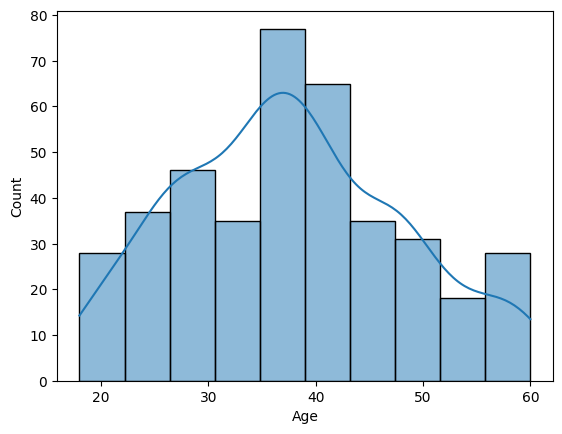

In [461]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Age', ylabel='Density'>

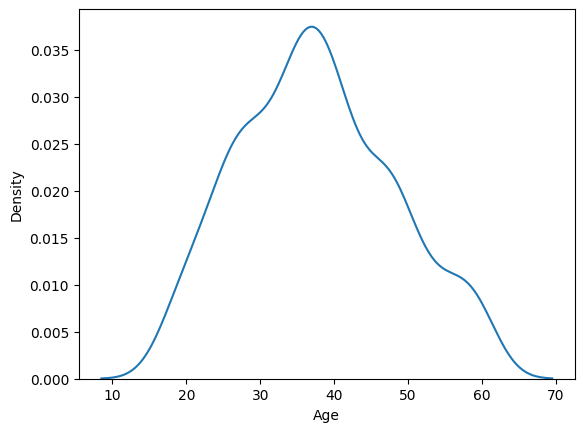

In [462]:
sns.kdeplot(df['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

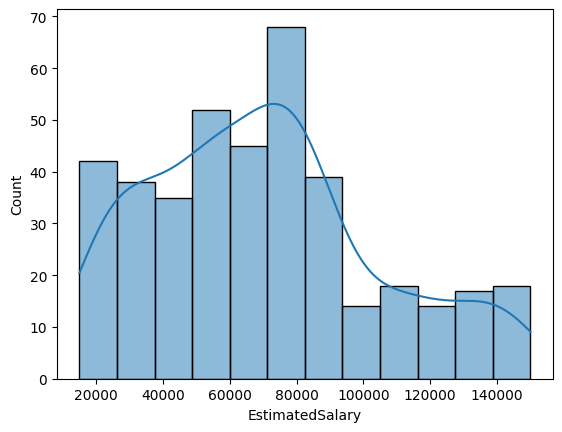

In [463]:
sns.histplot(df['EstimatedSalary'],kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

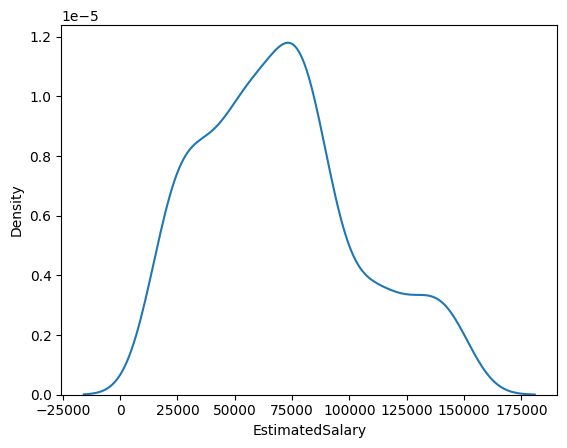

In [464]:
sns.kdeplot(df['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

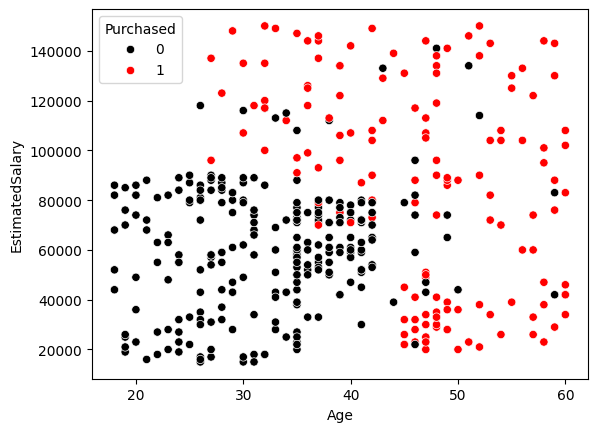

In [465]:
sns.scatterplot(x = df['Age'],y=df['EstimatedSalary'],hue = df['Purchased'],palette={0:'black',1:'red'})

### Getting the inputs and output

### Creating the Training Set and the Test Set

In [466]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis =1), df['Purchased'], test_size = 0.25, random_state = 3)

In [467]:
x_train.shape

(300, 2)

In [468]:
x_test.shape

(100, 2)

In [469]:
y_train.shape

(300,)

In [470]:
y_test.shape

(100,)

### Normalazation Data 

In [471]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [472]:
ss.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [473]:
ss.mean_

array([3.76866667e+01, 6.95533333e+04])

In [474]:
x_train_standardized = ss.transform(x_train)
x_test_standardized = ss.transform(x_test)

In [475]:
x_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.686667,69553.333333
std,10.792749,33423.608636
min,18.000000,15000.000000
25%,29.000000,43750.000000
50%,37.000000,70500.000000
75%,46.000000,87250.000000
max,60.000000,150000.000000


In [476]:
x_train_standardized = pd.DataFrame(x_train_standardized)
x_train_standardized.columns = x_train.columns
np.round(x_train_standardized.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


In [477]:
x_test.describe()

,Age,EstimatedSalary
count,100.000000,100.000000
mean,37.560000,70310.000000
std,9.543436,36210.856958
min,19.000000,15000.000000
25%,30.000000,42000.000000
50%,37.500000,65000.000000
75%,45.250000,88000.000000
max,60.000000,150000.000000


In [478]:
x_test_standardized = pd.DataFrame(x_test_standardized)
x_test_standardized.columns = x_test.columns
np.round(x_test_standardized.describe(),1)

,Age,EstimatedSalary
count,100.0,100.0
mean,-0.0,0.0
std,0.9,1.1
min,-1.7,-1.6
25%,-0.7,-0.8
50%,-0.0,-0.1
75%,0.7,0.6
max,2.1,2.4


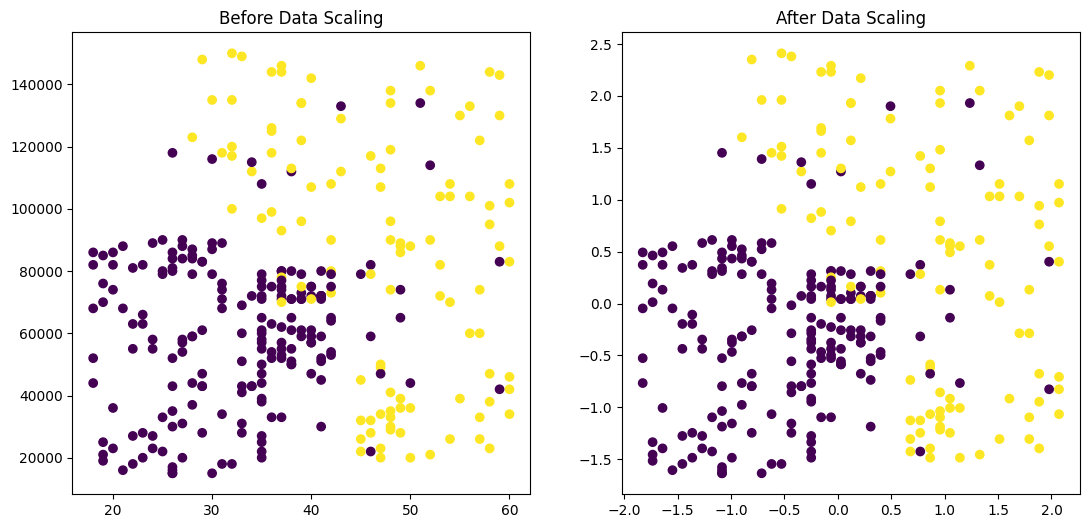

In [479]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sub_fig1.scatter(x_train['Age'],x_train['EstimatedSalary'],c = y_train)
sub_fig2.set_title('After Data Scaling')
sub_fig2.scatter(x_train_standardized['Age'],x_train_standardized['EstimatedSalary'],c = y_train)
plt.show()

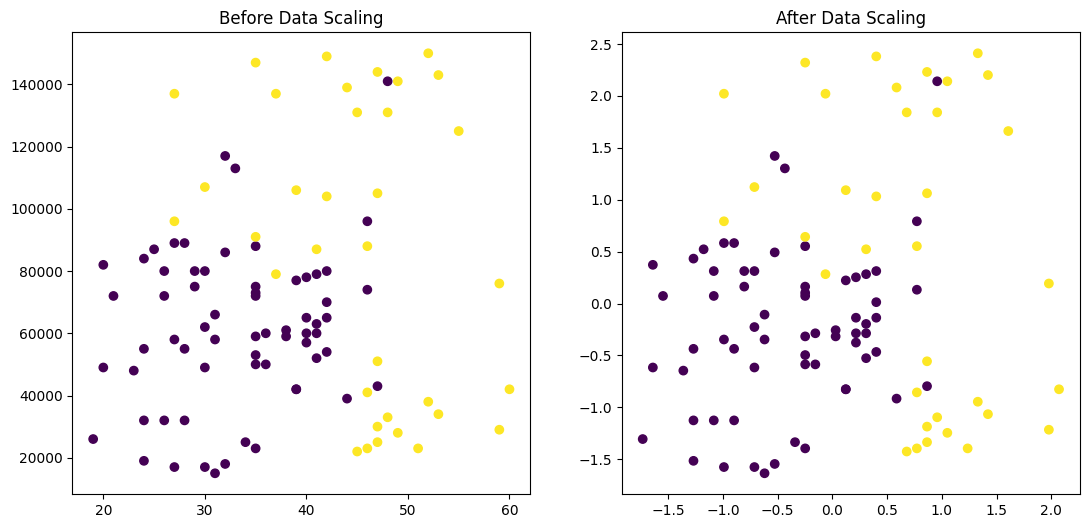

In [480]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sub_fig1.scatter(x_test['Age'],x_test['EstimatedSalary'],c = y_test)
sub_fig2.set_title('After Data Scaling')
sub_fig2.scatter(x_test_standardized['Age'],x_test_standardized['EstimatedSalary'],c = y_test)
plt.show()

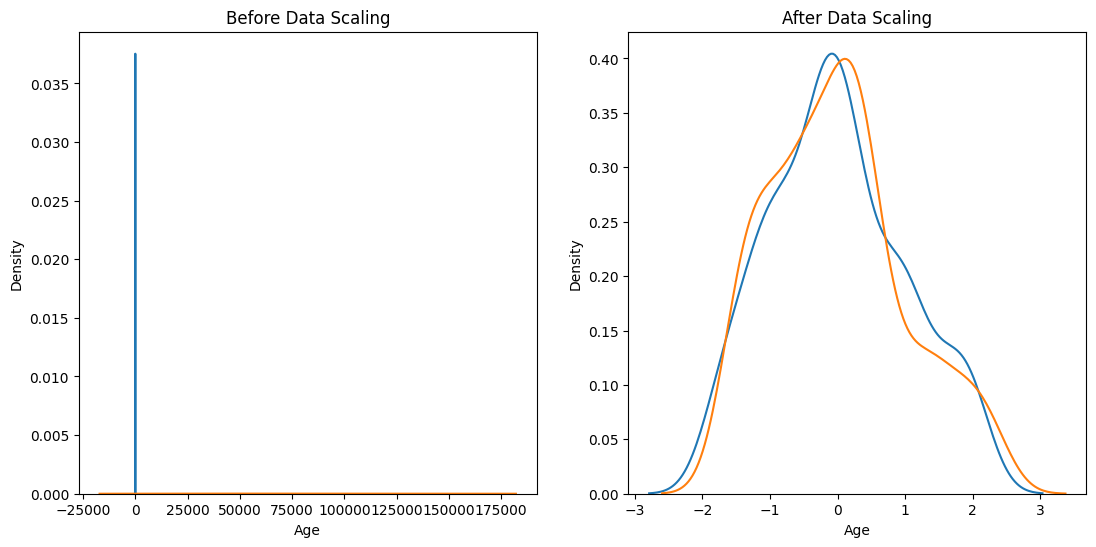

In [481]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sns.kdeplot(x_train['Age'],ax = sub_fig1)
sns.kdeplot(x_train['EstimatedSalary'],ax = sub_fig1)
sub_fig2.set_title('After Data Scaling')
sns.kdeplot(x_train_standardized['Age'],ax = sub_fig2)
sns.kdeplot(x_train_standardized['EstimatedSalary'],ax = sub_fig2)
plt.show()

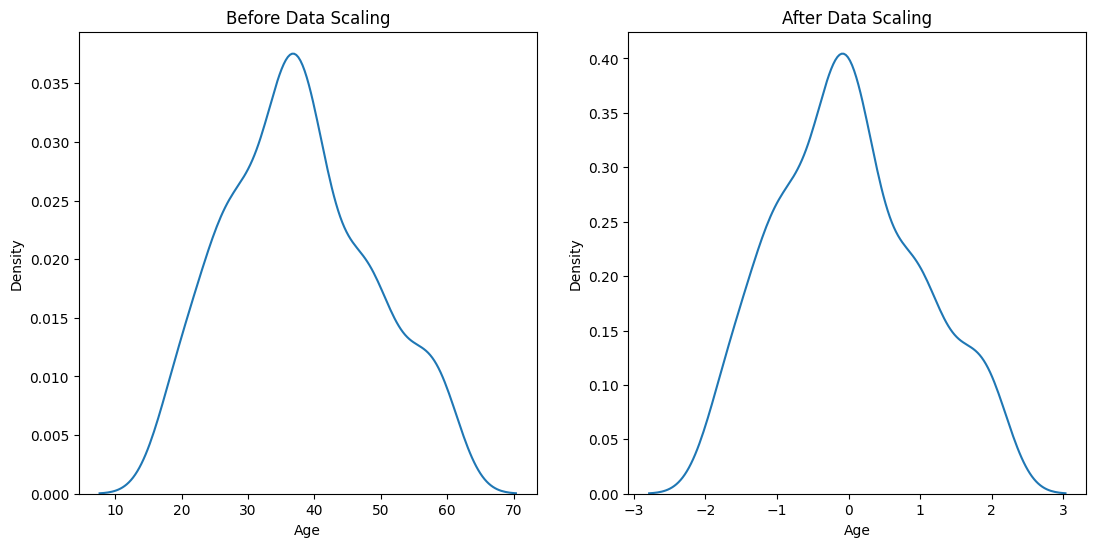

In [482]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sns.kdeplot(x_train['Age'],ax = sub_fig1)
#sns.kdeplot(x_train['EstimatedSalary'],ax = sub_fig1)
sub_fig2.set_title('After Data Scaling')
sns.kdeplot(x_train_standardized['Age'],ax = sub_fig2)
plt.show()

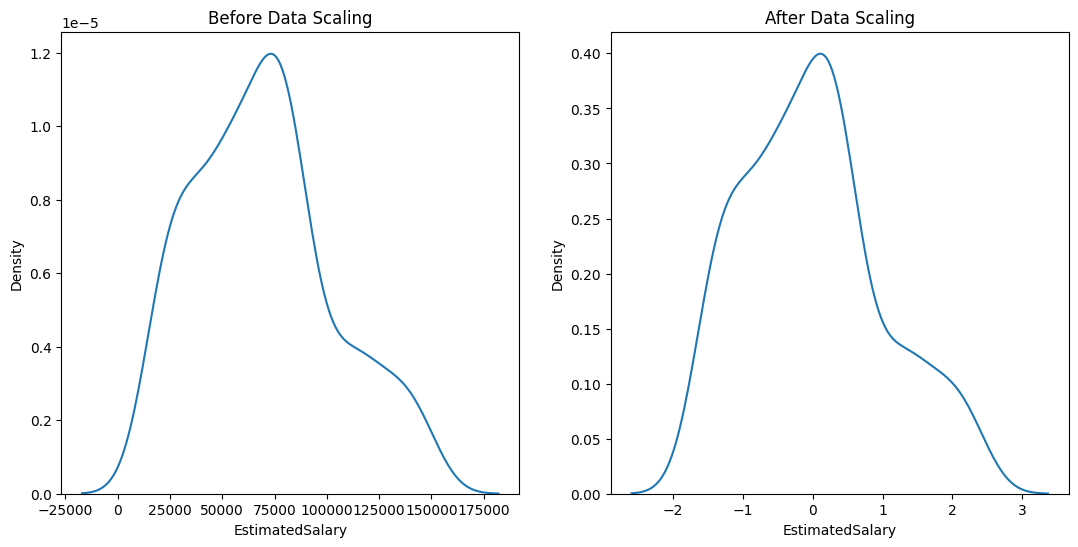

In [483]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
#sns.kdeplot(x_train['Age'],ax = sub_fig1)
sns.kdeplot(x_train['EstimatedSalary'],ax = sub_fig1)
sub_fig2.set_title('After Data Scaling')
#sns.kdeplot(x_train_normalized['Age'],ax = sub_fig2)
sns.kdeplot(x_train_standardized['EstimatedSalary'],ax = sub_fig2)
plt.show()

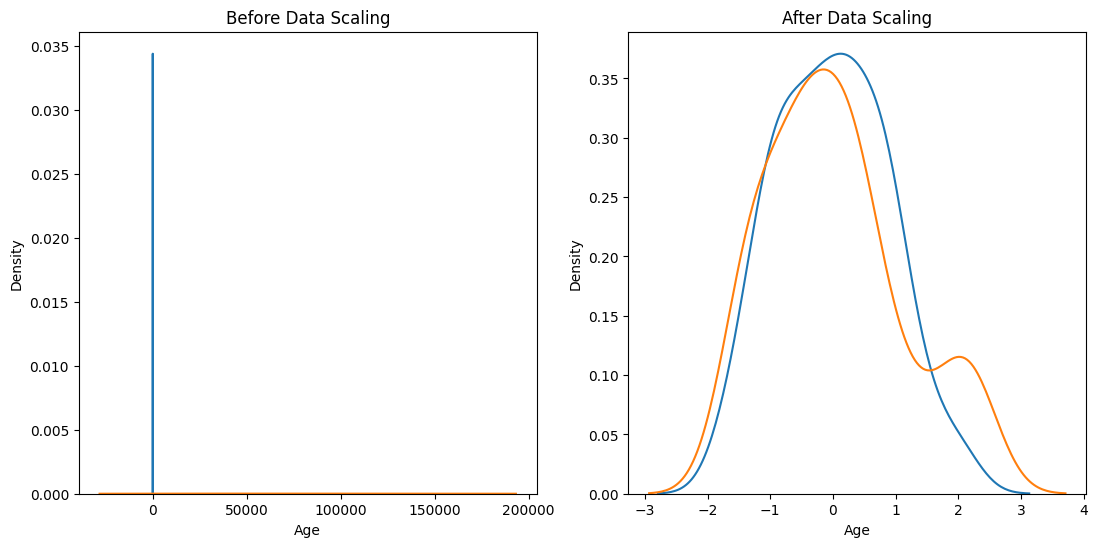

In [484]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sns.kdeplot(x_test['Age'],ax = sub_fig1)
sns.kdeplot(x_test['EstimatedSalary'],ax = sub_fig1)
sub_fig2.set_title('After Data Scaling')
sns.kdeplot(x_test_standardized['Age'],ax = sub_fig2)
sns.kdeplot(x_test_standardized['EstimatedSalary'],ax = sub_fig2)
plt.show()

## Part 2 - Building and training the model

### Building the model

In [485]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [486]:
model.fit(x_train_standardized,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Inference

Making the predictions of the data points in the test set

In [487]:
y_pred = model.predict(x_test_standardized)

In [488]:
y_pred

array([ 0.5942063 ,  0.42415473,  0.75254463, -0.18266631,  0.15962531,
        0.45402158,  0.52027902, -0.10857224,  0.40208282, -0.12849737,
        0.40802283,  0.28392831,  0.65023016,  0.22381936, -0.09450373,
       -0.19858973,  0.07765293,  0.06152102,  0.61202634,  0.3819909 ,
        0.27777982,  0.08573973,  0.17567383,  0.45406327,  0.41185775,
        0.13970019,  0.41004453,  1.05452734,  0.4840552 ,  0.3901194 ,
        0.80225321, -0.04243989,  0.61012973,  0.68224379,  0.363879  ,
        0.3760092 ,  0.30975176,  0.33392876,  0.37588411, -0.05061008,
        0.94041624,  0.3517071 ,  0.59997953,  0.28392831,  0.48822369,
        0.47407179, -0.30073742,  0.7962715 ,  0.31185685,  0.09955806,
        0.0495993 ,  0.15566531,  0.27786321,  0.18763724,  0.44416325,
        0.51606883, -0.05452839,  0.74429105, -0.03237308,  0.40199942,
       -0.0504016 ,  0.6063365 ,  0.91438431,  0.30385344,  0.24782958,
        0.37992751,  0.4961854 ,  0.8305987 ,  0.17171382,  1.03

Making the prediction of a single data point with AT = 15, V = 40, AP = 1000, RH = 75

## Part 3: Evaluating the model

### intercept (c)

### coef(M)

### R-Score

In [489]:
model.score(x_train_standardized,y_train)

0.4717164309213796

In [490]:
model.score(x_test_standardized,y_test)

0.42175461555480576

### R-Squared

In [491]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

In [492]:
r2

0.42175461555480576

### Adjusted R-Squared

In [493]:
k = x_test_standardized.shape[1]
n = x_test_standardized.shape[0]
r2_adj = 1 - (1 - r2) * (n-1)/(n-k-1)

In [494]:
r2_adj

0.4098320303085131